# Graded Challenge

Holla... 

Irpan Habibi, Batch 004 Full Time Data Science Program Hacktiv8

In this section the objectives are lead to evaluate the Regression concept as follows:

- Able to understand the concept of regression with Linear Regression
- Able to prepare data for use in Linear Regression models
- Able to implement Linear Regression to make predictions

***ii. Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from warnings import filterwarnings
filterwarnings('ignore')

***iii. Data Loading***

*Reading and Understanding The Data*

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [3]:
df.shape

(693071, 57)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [6]:
df.select_dtypes("object").describe().T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


***iv. Data Cleaning***

In [7]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

*there are missing values in column* ***price***

In [8]:
dfCopy = df.copy()

*Making duplicate dataset to secure original data while data cleaning*

In [9]:
dfCopy.shape

(693071, 57)

*Select several columns that will be further analyzed before being used as labels and features*

In [10]:
dfCopy = df[['hour','datetime','source',
             'destination','cab_type','product_id',
             'name','price','distance','surge_multiplier',
             'latitude','longitude','temperature',
             'humidity', 'visibility','icon']]
dfCopy.head(3)

,hour,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,humidity,visibility,icon
0,9,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,0.68,10.000,partly-cloudy-night
1,2,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,0.94,4.786,rain
2,1,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,0.75,10.000,clear-night


*changing datetime's datatype from object to datetime*

In [11]:
dfCopy['datetime'] = pd.to_datetime(dfCopy['datetime']).dt.normalize()

In [12]:
dfCopy =dfCopy[dfCopy['price'].isnull()==False]

In [13]:
dfc = dfCopy.copy()

*data clean has ready to use*

In [14]:
dfc.isnull().sum()

hour                0
datetime            0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
temperature         0
humidity            0
visibility          0
icon                0
dtype: int64

***v. Exploratory Data Analysis***

*Before doing further data analysis to create a model, I'll determine what column will be used as a label, from the dataset provided there are two predictors to be used as labels, there is* ***price column and the hour column*** *. Then I plot the distribution of both*

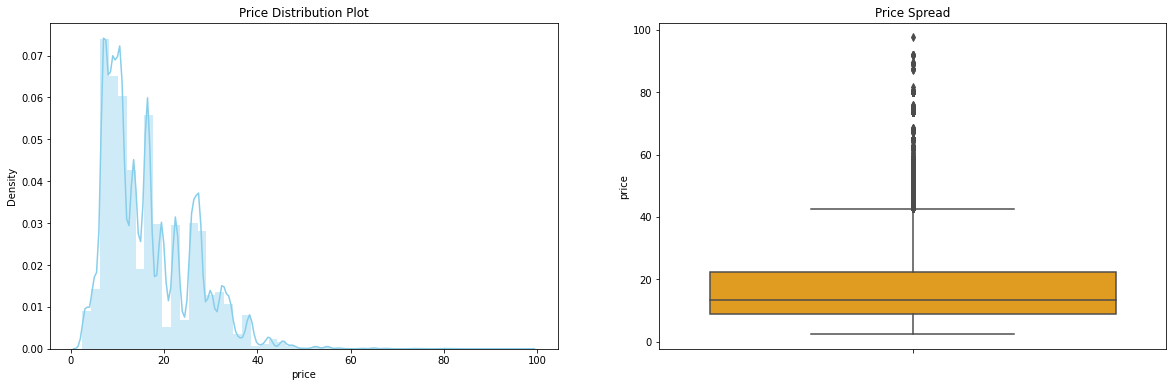

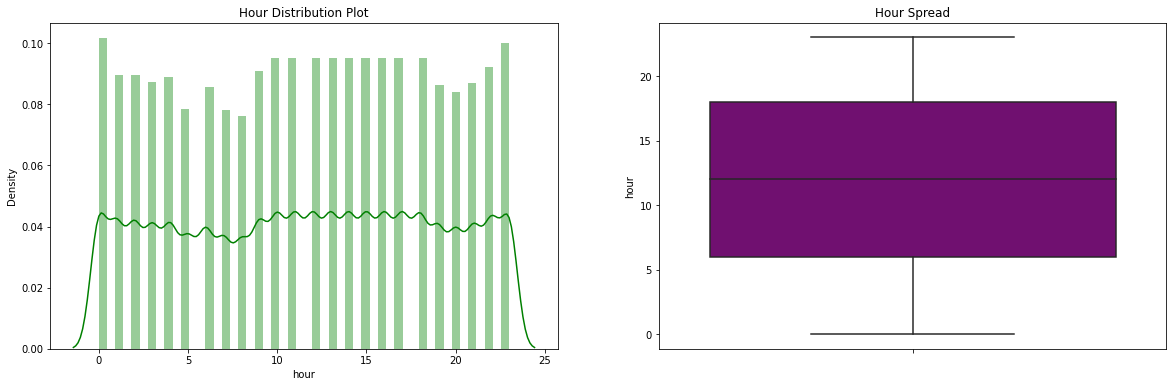

In [15]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(df.price , color = 'skyblue')

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.price, color = 'orange')

plt.show()

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Hour Distribution Plot')
sns.distplot(df.hour, color = 'green')

plt.subplot(1,2,2)
plt.title('Hour Spread')
sns.boxplot(y=df.hour, color='purple')

plt.show()

In [16]:
print(dfc.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
85%          27.500000
90%          30.000000
100%         97.500000
max          97.500000
Name: price, dtype: float64


*The price distribution plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 20 USD). There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 27.5 USD, whereas the remaining 15% are between 27.5 USD and 97.5 USD.)*

In [17]:
df_cat = dfc.select_dtypes(include='object')
df_cat.head(5)

,source,destination,cab_type,product_id,name,icon
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,rain
2,Haymarket Square,North Station,Lyft,lyft,Lyft,clear-night
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,clear-night
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,partly-cloudy-night


In [18]:
#*Making new variable for categorical dataset*
dfc.select_dtypes("object").describe().T

,count,unique,top,freq
source,637976,12,Financial District,54197
destination,637976,12,Financial District,54192
cab_type,637976,2,Uber,330568
product_id,637976,12,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,637976,12,UberXL,55096
icon,637976,7,cloudy,201429


In [19]:
df_cat.columns

Index(['source', 'destination', 'cab_type', 'product_id', 'name', 'icon'], dtype='object')

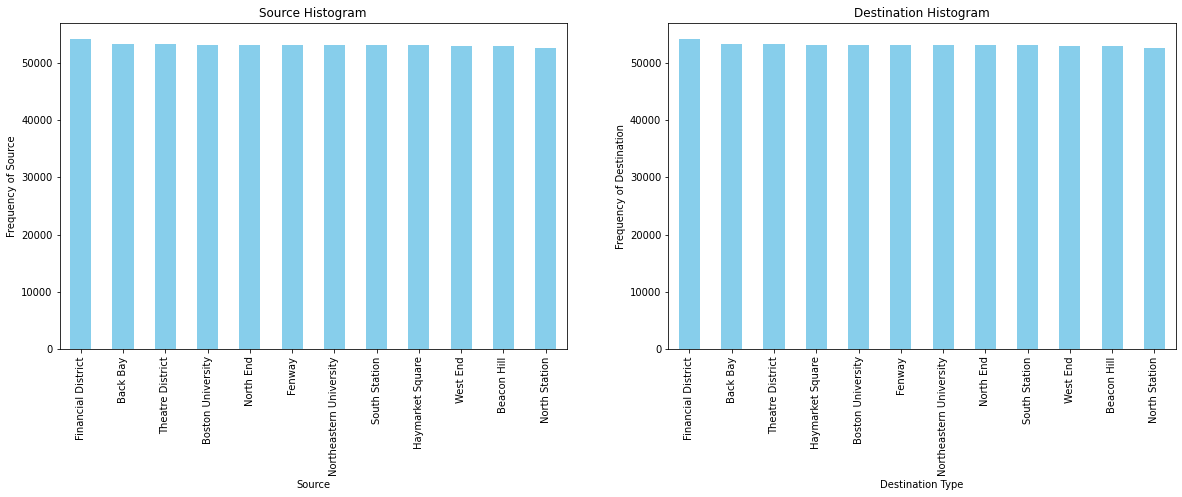

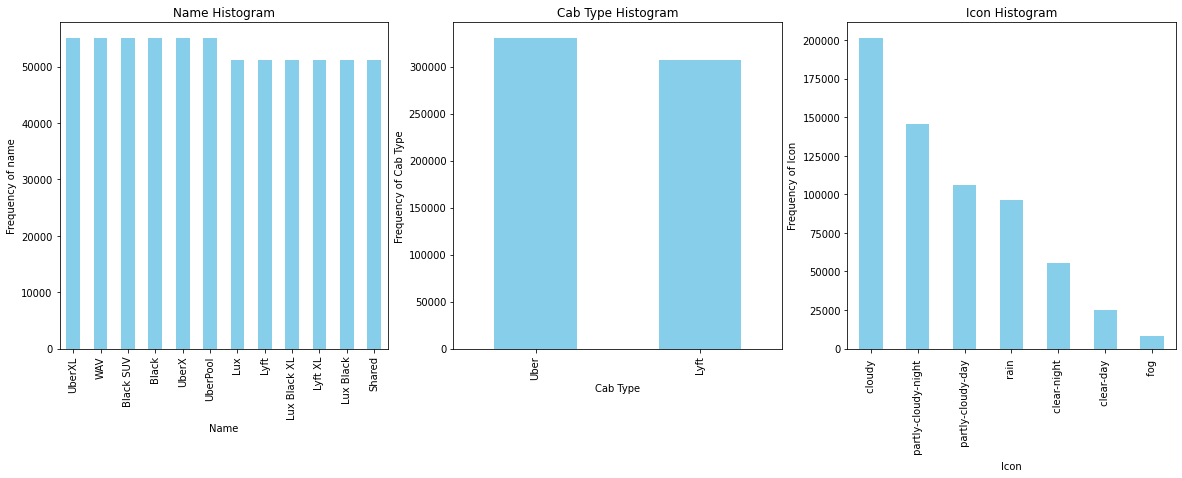

In [20]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt1 = dfc.source.value_counts().plot(kind='bar', color='skyblue')
plt.title('Source Histogram')
plt1.set(xlabel = 'Source', ylabel='Frequency of Source')

plt.subplot(1,2,2)
plt1 = dfc.destination.value_counts().plot(kind='bar', color='skyblue')
plt.title('Destination Histogram')
plt1.set(xlabel = 'Destination Type', ylabel='Frequency of Destination')

plt.show()

plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = dfc.name.value_counts().plot(kind='bar',color='skyblue')
plt.title('Name Histogram')
plt1.set(xlabel = 'Name', ylabel='Frequency of name')

plt.subplot(1,3,2)
plt1 = dfc.cab_type.value_counts().plot(kind='bar', color='skyblue')
plt.title('Cab Type Histogram')
plt1.set(xlabel = 'Cab Type', ylabel='Frequency of Cab Type')

plt.subplot(1,3,3)
plt1 = dfc.icon.value_counts().plot(kind='bar', color='skyblue')
plt.title('Icon Histogram')
plt1.set(xlabel = 'Icon', ylabel='Frequency of Icon')


plt.show()

*There is no significant difference between the categories in it, except icon columns*

In [21]:
#Making new variable for numerical dataset
df_num = dfc.select_dtypes(include='number')
df_num.head(5)

,hour,price,distance,surge_multiplier,latitude,longitude,temperature,humidity,visibility
0,9,5.0,0.44,1.0,42.2148,-71.033,42.34,0.68,10.000
1,2,11.0,0.44,1.0,42.2148,-71.033,43.58,0.94,4.786
2,1,7.0,0.44,1.0,42.2148,-71.033,38.33,0.75,10.000
3,4,26.0,0.44,1.0,42.2148,-71.033,34.38,0.73,10.000
4,3,9.0,0.44,1.0,42.2148,-71.033,37.44,0.70,10.000


In [22]:
df_num.describe()

,hour,price,distance,surge_multiplier,latitude,longitude,temperature,humidity,visibility
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,0.741056,8.469180
std,6.948776,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,0.138575,2.601828
min,0.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,0.380000,0.717000
25%,6.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,0.640000,8.432000
50%,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,0.710000,9.880000
75%,18.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,0.880000,9.996000
max,23.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,0.960000,10.000000


In [23]:
df_num.columns

Index(['hour', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'humidity', 'visibility'],
      dtype='object')

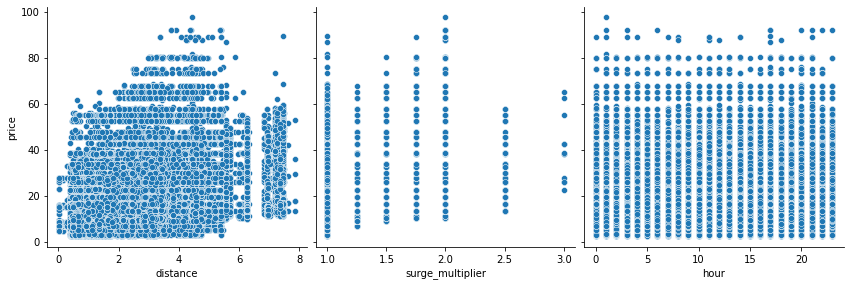

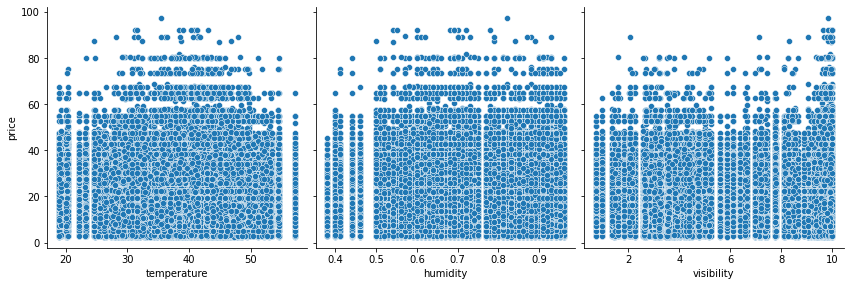

In [24]:
def pp(x,y,z):
    sns.pairplot(dfc, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('distance', 'surge_multiplier', 'hour')
pp('temperature', 'humidity', 'visibility')

*there is no linear correlation between numeric variables and the price columns after plotting data with scatter plot*

***vi. Data Preprocessing***

*After EDA is done, determine the column that will be used as a feature for further data preprocessing, the column used for the feature is the column that shows characteristics of the dataset.*

In [25]:
dfLr = dfc[['source','destination','cab_type',
             'name','price','distance','surge_multiplier',
             'temperature','humidity', 'visibility','icon']]

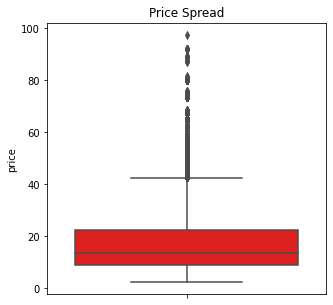

In [26]:
plt.figure(figsize=(5,5))

plt.title('Price Spread')
sns.boxplot(y=dfLr.price, color = 'r')

plt.show()

*before carrying out further processing for making models, then then change the price column into a normal distribution*

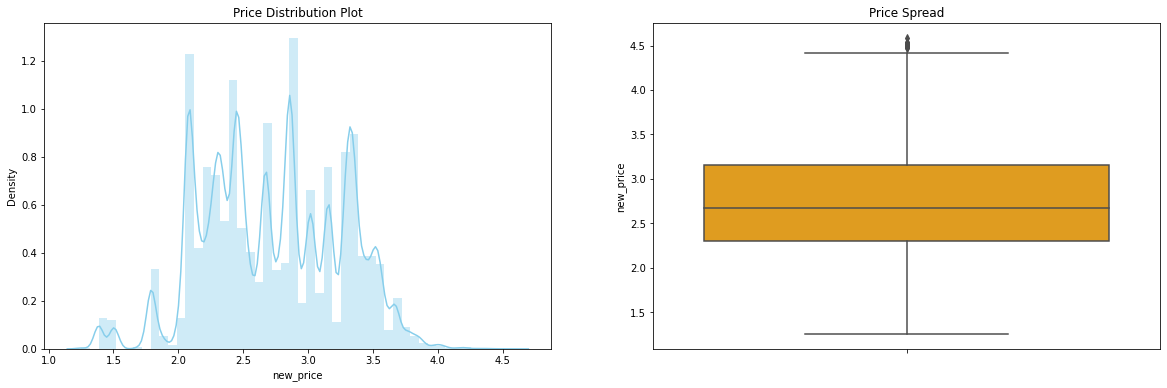

In [27]:
#np.log1p for making normal distribution in data
dfLr['new_price'] = np.log1p(dfLr['price'])

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(dfLr.new_price , color = 'skyblue')

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=dfLr.new_price, color = 'orange')

plt.show()

In [28]:
dfLr.drop(['price'],axis =1,inplace=True)

In [29]:
dfLr.head(3)

,source,destination,cab_type,name,distance,surge_multiplier,temperature,humidity,visibility,icon,new_price
0,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.34,0.68,10.000,partly-cloudy-night,1.791759
1,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,43.58,0.94,4.786,rain,2.484907
2,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,38.33,0.75,10.000,clear-night,2.079442


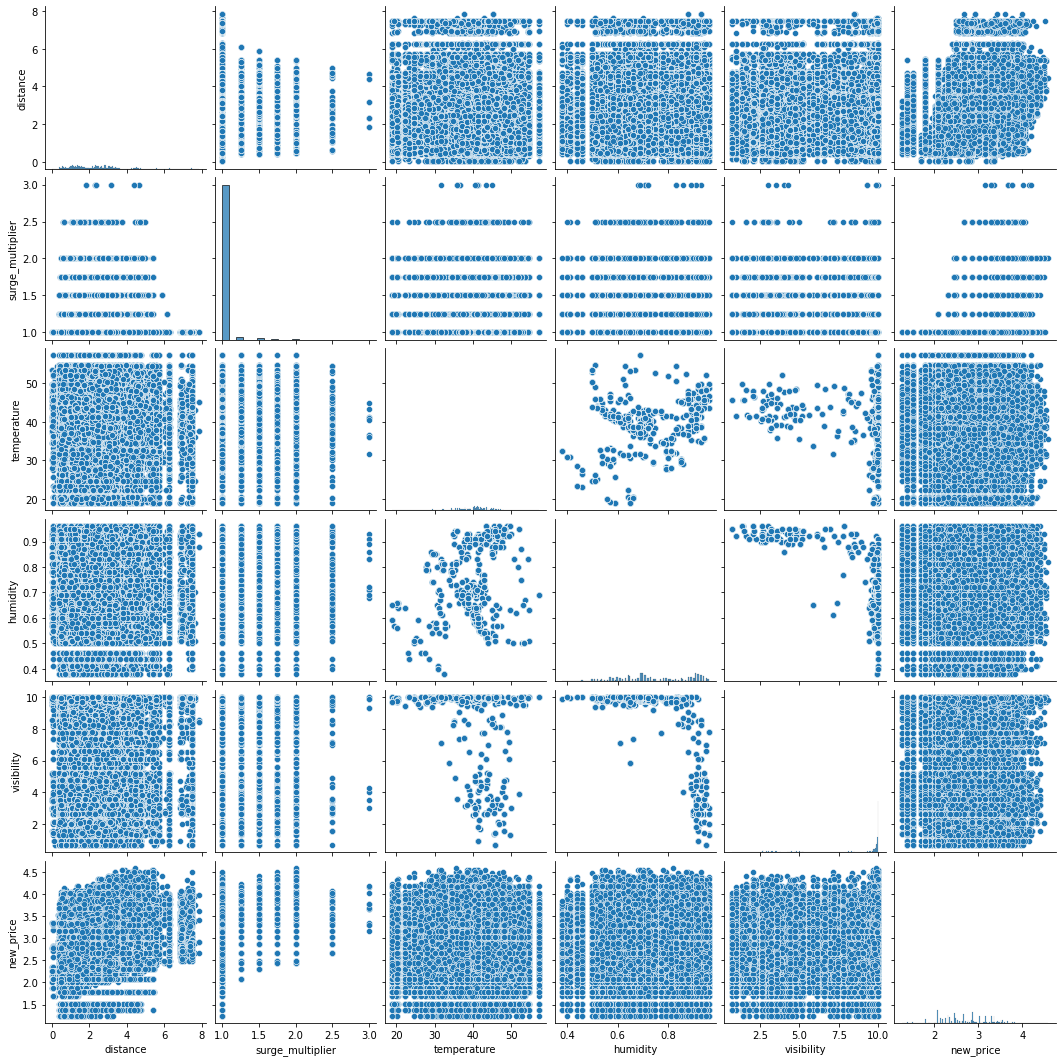

In [30]:
#shows correlation between features and label
sns.pairplot(dfLr)
plt.show()

*After plotting, there is no linear correlation between features and labels, this is because some features are categorical data*

In [31]:
dfLr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  object 
 3   name              637976 non-null  object 
 4   distance          637976 non-null  float64
 5   surge_multiplier  637976 non-null  float64
 6   temperature       637976 non-null  float64
 7   humidity          637976 non-null  float64
 8   visibility        637976 non-null  float64
 9   icon              637976 non-null  object 
 10  new_price         637976 non-null  float64
dtypes: float64(6), object(5)
memory usage: 58.4+ MB


In [32]:
dfLr.columns

Index(['source', 'destination', 'cab_type', 'name', 'distance',
       'surge_multiplier', 'temperature', 'humidity', 'visibility', 'icon',
       'new_price'],
      dtype='object')

***vii. Model Building***

In [33]:
#model definition for features and target, split train-dev-test
features = dfLr.drop(columns='new_price')
target = dfLr['new_price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 12)

In [34]:
#encoding model
numeric_features = ['distance','surge_multiplier', 'temperature', 'humidity', 'visibility' ]

categorical_features = [ 'source', 'destination', 'cab_type', 'name', 'icon']

numeric_transformer = Pipeline([('scaler', StandardScaler())
                               ])

categorical_transformer = Pipeline([('encoder', OneHotEncoder())
                                   ])

preprocessor = ColumnTransformer([
        ('num', numeric_transformer,numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder = 'passthrough')

***viii. Model Training***

In [35]:
linreg = LinearRegression()
linreg_pipe = Pipeline([
    ('preprocessor',preprocessor),
      ('linear_regression',linreg)])
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['distance',
                                                   'surge_multiplier',
                                                   'temperature', 'humidity',
                                                   'visibility']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['source', 'destination',
                                                   'cab_type', 'name',
                                     

In [36]:
y_pred = linreg_pipe.predict(X_test)

In [37]:
 y_pred

array([3.47617548, 3.62165575, 2.08313366, ..., 1.5920149 , 2.23469474,
       2.4899375 ])

***ix. Model Evaluation***

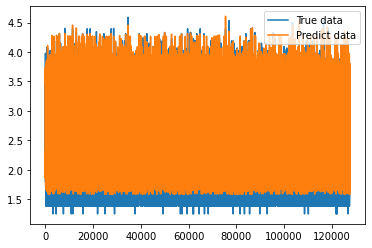

In [38]:
#shows predict data and true data to compare
fig,ax = plt.subplots()

plt.rcParams['agg.path.chunksize'] = 10000
y_test_reset = y_test.reset_index(drop=True)

ax.plot(y_test_reset.index.values, y_test, label='True data')
ax.plot(y_test_reset.index.values, y_pred, label='Predict data')
plt.legend()

*there is a very slight difference between the true data and the predicted data*

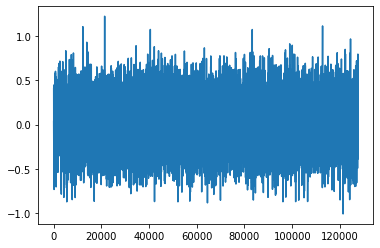

In [39]:
gap = y_test - y_pred
gap.reset_index(drop=True).plot()
plt.show()

*gap shows the intersection between true data and predicted data*

In [40]:
diff1 = y_test - y_pred
error1 = np.sqrt(np.mean(np.power(diff1,2)))
print('Error after predict: %.3f' %error1)

Error after predict: 0.126


*a small error indicates a good model accuracy*

In [41]:
# print(accuracy_score(y_test,y_pred))

In [42]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.2f' %mse)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae)


MSE: 0.02
MAE: 0.089


Text(0, 0.5, 'y_pred')

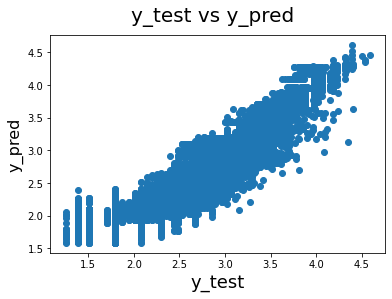

In [43]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

***x. Model Inference***

In [44]:
dfLr['price'] = np.expm1(dfLr['new_price'])
dfLr.drop(['new_price'],axis=1,inplace=True)

In [45]:
dfLr.head()

,source,destination,cab_type,name,distance,surge_multiplier,temperature,humidity,visibility,icon,price
0,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.34,0.68,10.000,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,43.58,0.94,4.786,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,38.33,0.75,10.000,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,34.38,0.73,10.000,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,37.44,0.70,10.000,partly-cloudy-night,9.0


In [46]:
#make new data for test predict 
new_data = [{'source':'Haymarket Square',
             'destination':'North Station',
             'cab_type':'Lyft',
             'name':'Lyft XL',
             'distance':0.44,
             'surge_multiplier':1.0,
             'temperature':34.38,
             'humidity':0.70,
             'visibility':4.786,
             'icon':' rain '}]

In [47]:
test = pd.DataFrame(new_data,index=[1])
test

,source,destination,cab_type,name,distance,surge_multiplier,temperature,humidity,visibility,icon
1,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,34.38,0.7,4.786,rain


In [48]:
pred = linreg_pipe.predict(test)
pred

array([2.44822828])

In [49]:
print("your expected price is S$",(np.expm1(pred)[0]).round(2))

your expected price is S$ 10.57


***xi. Conclussion***

Based on the modeling using linear regression to determine price predictions from the dataset with several features as a reference. Firstly, the error obtained after conducting the evaluation is very low, it shows that the model has a fairly good generalized.

In addition, an inference model is carried out by making price predictions using new data that makes it possible to see predicted prices

**Thanks.**